In [1]:
import numpy as np

In [2]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [3]:
def relu(z):
    a = np.maximum(0, z)
    return a

In [4]:
def tanh(z):
    a = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return a

In [5]:
def activation(z, act):
    if act == "sigmoid":
        return sigmoid(z)
    elif act == "relu":
        return relu(z)
    else:
        return tanh(z)

In [6]:
# al_1: a[l-1]
def backward_propagation_sigmoid(dzl, wl, zl, al_1):
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    dzl_1 = dal_1 * al_1 * (1-al_1)
    return dzl_1, dwl, dbl

In [7]:
def backward_propagation_relu(dzl, wl, zl, al_1):
    temp = al_1 >= 0
    temp = temp.astype("int")
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    dzl_1 = dal_1 * temp
    return dzl_1, dwl, dbl

In [8]:
def backward_propagation_tanh(dzl, wl, zl, al_1):
    dwl = np.dot(dzl, al_1.T)
    dbl = dzl
    dal_1 = np.dot(wl.T, dzl)
    dzl_1 = dal_1 * (1-al_1)
    return dzl_1, dwl, dbl

In [9]:
def backward_propagation(dal, wl, zl, al_1, act):
    if act == "sigmoid":
        return backward_propagation_sigmoid(dal, wl, zl, al_1)
    elif act == "relu":
        return backward_propagation_relu(dal, wl, zl, al_1)
    else:
        return backward_propagation_tanh(dal, wl, zl, al_1)

In [10]:
class fully_connected:
    def __init__(self, shape, activation):
        self.shape = shape
        self.activation = activation
        self.W = np.random.randn(*self.shape)*0.01
        self.b = np.zeros((shape[0], 1))
        
    def activate(self, x):
        assert self.W.shape[-1] == x.shape[0]
        assert self.W.shape[0] == self.b.shape[0]
        z = np.dot(self.W, x) + self.b
        a = activation(z, self.activation)
        return a, z, self.W, x

In [49]:
class network:
    def __init__(self):
        self.layers = []
        
    def forward_propagate(self, X):
        cache = {}
        al = X
        for layer, l in zip(self.layers, range(1, len(self.layers)+1)):
            al, zl, wl, al_1 = layer.activate(al)
            cache["l" + str(l)] = [zl, wl, al_1]
        return al, cache
    
    def backward_propagate(self, dzl, cache):
        grads = {}
        for l in reversed(range(1, len(self.layers)+1)):
            zl, wl, al_1 = cache["l" + str(l)]
            dzl, dwl, dbl = backward_propagation(dzl, wl, zl, al_1, self.layers[l-1].activation)
            grads["dW" + str(l)] = dwl
            grads["db" + str(l)] = dbl
        return grads
    
    def update(self, grads, learning_rate):
        for l in range(len(self.layers)):
            self.layers[l].W = self.layers[l].W - learning_rate*grads["dW" + str(l+1)]
            self.layers[l].b = self.layers[l].b - learning_rate*grads["db" + str(l+1)]
    
    def cost(self, y_hat, y):
        J = -1/400*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
        return J
    
    def train(self, X, Y, iterations, learning_rate):
        losses = []
        for i in range(iterations):
            Y_hat, cache = self.forward_propagate(X)
            J = self.cost(Y_hat, Y)
            if i % 1000 == 0:
                print(J)
            losses.append(J)
            dzl = Y_hat - Y
            grads = self.backward_propagate(dzl, cache)
            self.update(grads, learning_rate)
        return losses

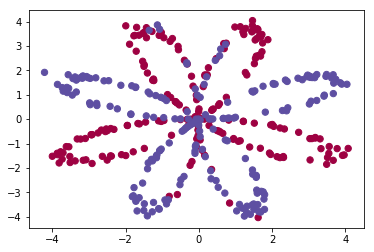

In [15]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    X = X.T
    Y = Y.T
    return X, Y

X, Y = load_planar_dataset()

import matplotlib.pyplot as plt
plt.scatter(X[0, :], X[1, :],c=Y.reshape(Y.shape[-1]), s=40, cmap=plt.cm.Spectral);

0.346573581265088
0.0004172456439032915
0.0002085021060384644
0.0001389701431452381
0.00010421486335654568
8.336541543504498e-05
6.94674248420477e-05
5.954112844456929e-05
5.209688174663532e-05
4.630720227185298e-05


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'iteration')]

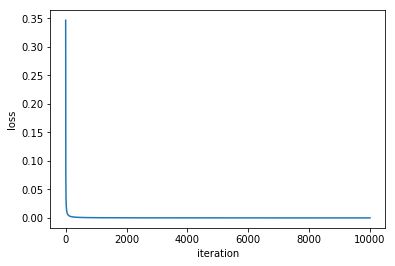

In [50]:
np.random.seed(1)
layers = [fully_connected((4, 2), "relu"), fully_connected((3, 4), "relu"), fully_connected((1, 3), "sigmoid")]

net = network()
net.layers = layers

losses = net.train(X, Y, 10000, 1.2)
fig, ax = plt.subplots()
ax.plot(range(10000), losses)
ax.set(xlabel='iteration', ylabel='loss')

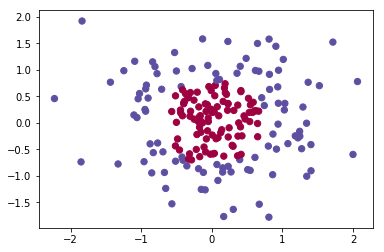

In [46]:
import sklearn
import sklearn.datasets
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

X, Y = gaussian_quantiles
X = X.T
Y = Y.reshape((Y.shape[0], 1)).T
plt.scatter(X[0, :], X[1, :],c=Y.reshape(Y.shape[-1]), s=40, cmap=plt.cm.Spectral);

In [41]:
X.shape

(2, 200)